<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image formation and pinhole camera model
src: http://csundergrad.science.uoit.ca/courses/cv-notes/notebooks/01-image-formation.html

1. Pinhole camera model
2. Homoegenous coordinates
3. Intrinsic and extrinsic camera matrices
4. Lens effects
5. Camera calibration

**Pinhole camera model**

<img src="https://drive.google.com/uc?id=1FfUeZvrbFdDfp6ZPlqxOw3cnJTdvK1Ml" width="400"/>
<img src="https://drive.google.com/uc?id=1RzMQ6lrudJDCqEWt0TlGUEK9yhicF9g2" width="400"/>

**Homogeneous Coordinates**: Represent a 2D point (x,y) by a 3D point (x’,y’,z’) by
adding a “fictitious” third coordinate. By convention, we specify that given (x’,y’,z’) we can recover the 2D point (x,y) as:<br>
x = x’/z’ and y = y’/z’<br>
Note: (x,y) = (x,y,1) = (2x, 2y, 2) = (kx, ky, k)
for any nonzero k (can be negative as well as positive)<br>

**Cross-product** of two vectors (𝑑,𝑒,𝑓) and  (𝑟,𝑠,𝑡) is:(𝑒𝑡−𝑠𝑓)𝑖̂ -(𝑑𝑡−𝑟𝑓)𝑗̂ + (𝑑𝑠−𝑟𝑒)𝑘̂ <br>
**Exercise**: computing a representation of a line from homogenous coordinates<br>
Find a representation of the line between points  𝐚=(1,2)
  and  𝐛=(4,3)
  using homogeneous coordinates.

Solution:


In [65]:
import numpy as np
import math
from scipy import linalg

ah = np.array([1,2,1])
bh = np.array([4,3,1])
l = np.cross(ah, bh)
print('l = {}'.format(l))
print('Computed line passes through point a: {}'.format(math.isclose(np.dot(ah, l), 0.0)))
print('Computed line passes through point b: {}'.format(math.isclose(np.dot(bh, l), 0.0)))

l = [-1  3 -5]
Computed line passes through point a: True
Computed line passes through point b: True


**Example**: finding the intersection of two lines using homogeneous coordinates<br>
Use homogeneous coordinates to determine the intersection location for the following two lines.

3𝑥−𝑦+7=0<br>
2𝑥−𝑦+1=0

In [68]:
l1 = np.array([3,-1,7])
l2 = np.array([2,-1,1])

ph = np.cross(l1, l2)
print('ph = {}'.format(ph))

p = ph[:2] / ph[2]
print('p = {}'.format(p))
print('Point p sits on l1: {}'.format(math.isclose(np.dot(l1, np.append(p,[1])), 0.0))) # if dot product is zero
print('Point p sits on l2: {}'.format(math.isclose(np.dot(l2, np.append(p,[1])), 0.0)))

ph = [ 6 11 -1]
p = [ -6. -11.]
Point p sits on l1: True
Point p sits on l2: True


0.0

Camera Calibration:
Camera calibration or camera resectioning estimates the parameters of a pinhole camera model given photograph. Usually, the pinhole camera parameters are represented in a 3 × 4 matrix called the camera matrix. We use these parameters to estimate the actual size of an object or determine the location of the camera in the world.

#Feature detection
Source: https://blog.francium.tech/feature-detection-and-matching-with-opencv-5fd2394a590<br>
Mathematical representations of key areas in an image are the features. Features are the vector representations of the visual content from an image so that we can perform mathematical operations on them. Features from an image plays an important role in computer vision for variety of applications including object detection, motion estimation, segmentation, image alignment and a lot more. Features may include edges, corners or parts of an image. List of feature detection techniques:<br>
Haris corner detection<br>
Shi-Tomasi corner detection<br>
SIFT (Scale-Invariant Feature Transform)<br>
SURF (Speeded-Up Robust Features)<br>
FAST algorithm for corner detection<br>
ORB (Oriented FAST and Rotated Brief)


In [1]:
!pip -q install opencv-python==3.4.9.31
!pip -q install opencv-contrib-python==3.4.9.31

import cv2
cv2.__version__

'3.4.9'

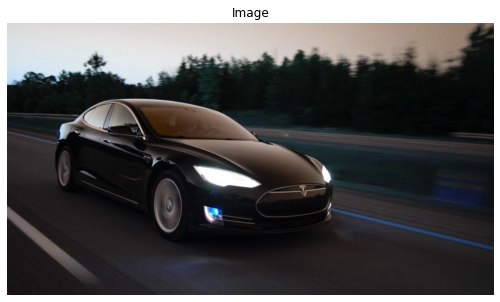

In [2]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
plt.axis('off')
ax.set_title('Image');

Haris corner detection

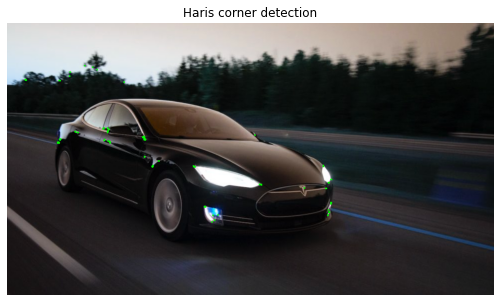

In [33]:
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)
dst = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > 0.04 * dst.max()] = [0, 255, 0]

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
plt.axis('off')
ax.set_title('Haris corner detection');

Shi-Tomasi corner detection<br>
Shi and Tomasi came up with a different scoring function than the one used in Haris corner detector to find N strongest corners from an image.

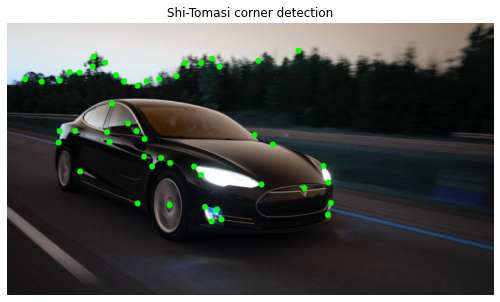

In [42]:
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50, qualityLevel=0.04, minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (int(x), int(y)), 6, (0, 255, 0), -1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
plt.axis('off')
ax.set_title('Shi-Tomasi corner detection');

SIFT (Scale-Invariant Feature Transform)<br>
SIFT is both rotation as well as scale invariant. SIFT provides key points and keypoint descriptors where keypoint descriptor describes the keypoint at a selected scale and rotation with image gradients.

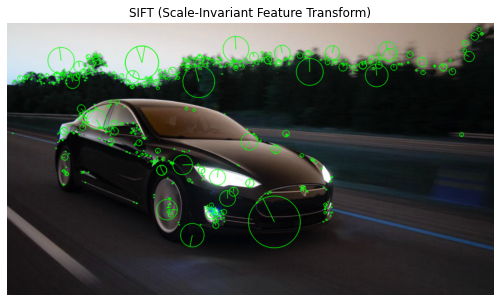

In [40]:
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('SIFT (Scale-Invariant Feature Transform)');

Above image has circles depicting the key points/features, where size of the circle represents the strength of the key point and the line inside the circle denotes the orientation of the key point.

SURF (Speeded-Up Robust Features)<br>
Even though SIFT works well it performs intensive operations which are time consuming. SURF was introduced to have all the advantages of SIFT with reduced processing time.

Building opencv with "OPENCV_ENABLE_NONFREE=ON"

In [ ]:
!wget -O opencv.zip https://github.com/opencv/opencv/archive/4.0.0.zip
!wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/4.0.0.zip

!unzip -q opencv.zip
!unzip -q opencv_contrib.zip

!mv opencv-4.0.0 opencv
!mv opencv_contrib-4.0.0 opencv_contrib

!cp -rf opencv_contrib /root
%cd opencv
!mkdir build
%cd build

!cmake -D CMAKE_BUILD_TYPE=RELEASE \
	-D CMAKE_INSTALL_PREFIX=/usr/local \
	-D INSTALL_PYTHON_EXAMPLES=ON \
	-D INSTALL_C_EXAMPLES=OFF \
	-D OPENCV_ENABLE_NONFREE=ON \
	-D OPENCV_EXTRA_MODULES_PATH=~/opencv_contrib/modules \
	-D PYTHON_EXECUTABLE=~/.virtualenvs/cv/bin/python \
	-D BUILD_EXAMPLES=ON ..

!make -j16

!sudo make install
!sudo ldconfig

In [7]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
surf = cv2.xfeatures2d.SURF_create()
kp, des = surf.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('SURF (Speeded-Up Robust Features)');

error: ignored

FAST (Features from Accelerated Segment Test) algorithm for corner detection<br>
SURF is fast when compared to SIFT but not as fast to use it with real time devices like mobile phones. So FAST algorithm was introduced with reduced processing time. However FAST gives us only the key points and we may need to compute descriptors with other algorithms like SIFT and SURF.

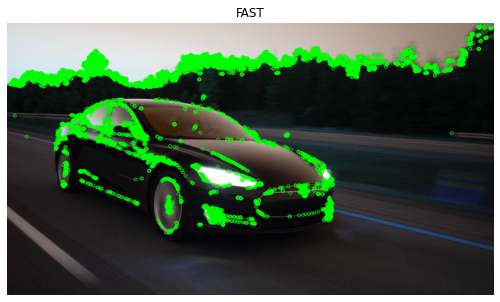

In [5]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('FAST');

BRIEF (Binary Robust Independent Elementary Features)<br> 
is an efficient feature point descriptor. It is highly discriminative even when using relatively few bits and is computed using simple intensity difference tests. BRIEF does not have a sampling pattern thus pairs can be chosen at any point on the SxS patch.

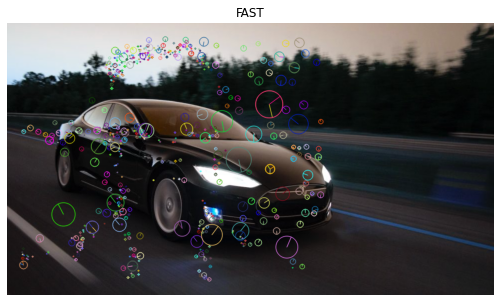

In [15]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
training_image = cv2.imdecode(arr, -1) # 'Load it as it is'
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
train_keypoints, train_descriptor = brief.compute(training_gray, train_keypoints)
keypoints_with_size = np.copy(training_image)
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(keypoints_with_size)
plt.axis('off')
ax.set_title('FAST');

ORB<br>
ORB is an efficient open source alternative to SIFT and SURF. Even though it computes less key points when compared to SIFT and SURF yet they are effective. It uses FAST and BRIEF techniques to detect the key points and compute the image descriptors respectively.

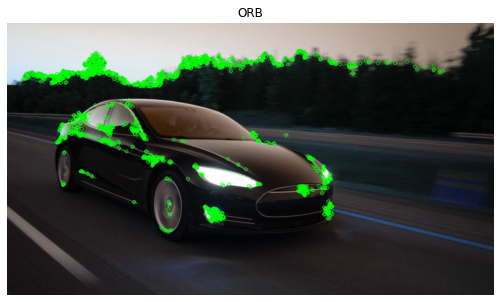

In [6]:
import cv2
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('ORB');

#Feature matching
Feature matching refers to finding corresponding features from two similar images based on a search distance algorithm. One of the images is considered the source and the other as target, and the feature matching technique is used to either find or derive and transfer attributes from source to target image.

Brute-Force (BF) Matcher

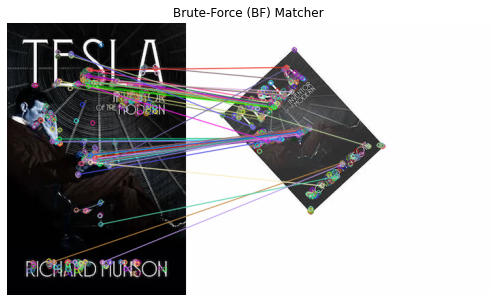

In [6]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

url1 = 'https://miro.medium.com/v2/resize:fit:526/format:webp/1*pah6Xg1Gr3ayaGhliQvrcw.jpeg'
req = urllib.request.Request(url1, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr, -1) # 'Load it as it is'

url2 = 'https://miro.medium.com/v2/resize:fit:640/format:webp/1*PRNWAS4JXJYjdgobPq7ejg.jpeg'
req = urllib.request.Request(url2, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img2 = cv2.imdecode(arr, -1) # 'Load it as it is'

# img1 = cv2.imread('book_cover.jpg', 0)
# img2 = cv2.imread('book_cover_rotated.jpg', 0)


orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(match_img)
plt.axis('off')
ax.set_title('Brute-Force (BF) Matcher');

FLANN based matcher<br>
Fast Library for Approximate Nearest Neighbors (FLANN) is optimised to find the matches with search even with large datasets hence its fast when compared to Brute-Force matcher.

With ORB and FLANN matcher let us extract the tesla book cover from the second image and correct the rotation with respect to the first image

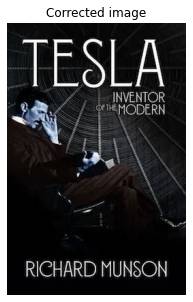

In [7]:
import argparse

import cv2
import numpy as np
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def get_corrected_img(img1, img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=500)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) > MIN_MATCHES:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        m, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
        corrected_img = cv2.warpPerspective(img1, m, (img2.shape[1], img2.shape[0]))

        return corrected_img
    return img2


if __name__ == "__main__":
    parser = argparse.ArgumentParser(add_help=False)
    parser.add_argument("--src", default='book_cover.jpg', help="path for the object image")
    parser.add_argument("--dest", default='book_cover_rotated.jpg', help="path for image containing the object")
    args = parser.parse_args([])

    url1 = 'https://miro.medium.com/v2/resize:fit:526/format:webp/1*pah6Xg1Gr3ayaGhliQvrcw.jpeg'
    req = urllib.request.Request(url1, headers={'User-Agent' : "Magic Browser"}) 
    req = urllib.request.urlopen( req )
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    im1 = cv2.imdecode(arr, -1) # 'Load it as it is'

    url2 = 'https://miro.medium.com/v2/resize:fit:640/format:webp/1*PRNWAS4JXJYjdgobPq7ejg.jpeg'
    req = urllib.request.Request(url2, headers={'User-Agent' : "Magic Browser"}) 
    req = urllib.request.urlopen( req )
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    im2 = cv2.imdecode(arr, -1) # 'Load it as it is'

    img = get_corrected_img(im2, im1)
    # cv2.imshow('Corrected image', img)
    # cv2.waitKey()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(img)
    plt.axis('off')
    ax.set_title('Corrected image');

#Overall: SIFT + Brute-Force (BF) for Feture Detection and Matching
src: https://github.com/deepanshut041/feature-detection <br>

Prepare images

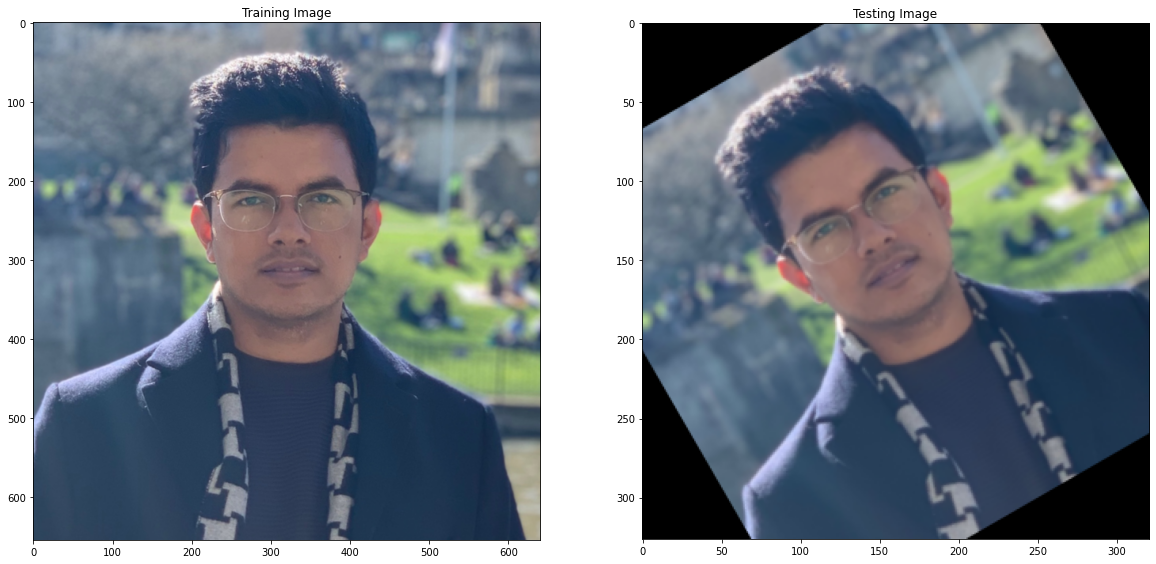

In [10]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt

# Load the image
url1 = 'https://mobarakol.github.io/pic/mobarak_photo.jpg'
req = urllib.request.Request(url1, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image1 = cv2.imdecode(arr, -1) # 'Load it as it is'
# image1 = cv2.imread('./images/face1.jpeg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
training_image = cv2.pyrDown(training_image)
# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)


# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
# test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

SIFT: Feature / keypoints Detection and Build Descriptor 

Number of Keypoints Detected In The Training Image:  689
Number of Keypoints Detected In The Query Image:  367


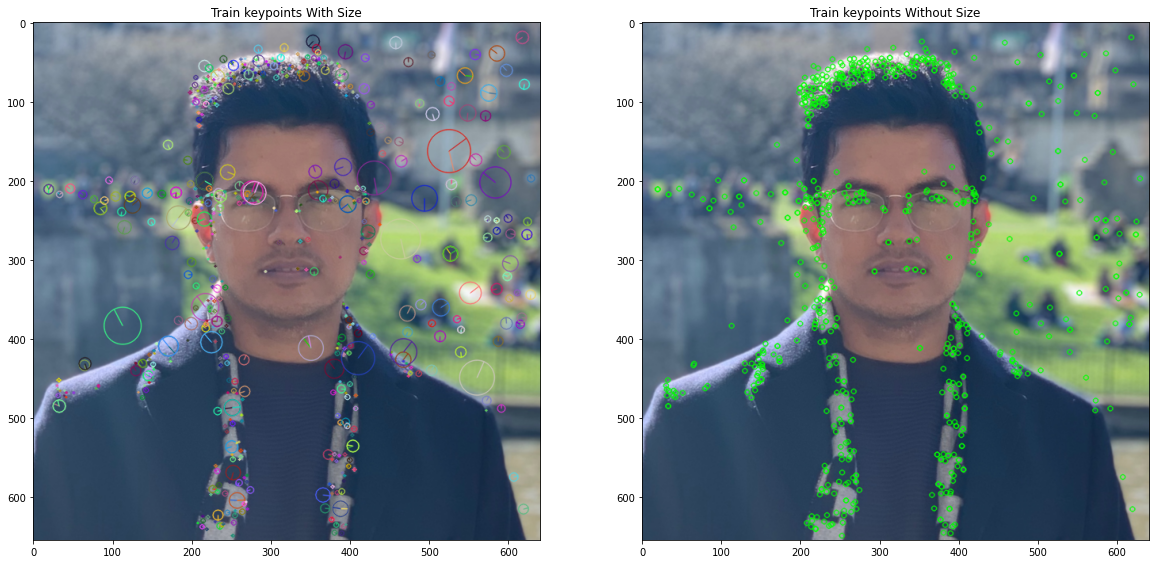

In [12]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

BF: Matching Keypoints

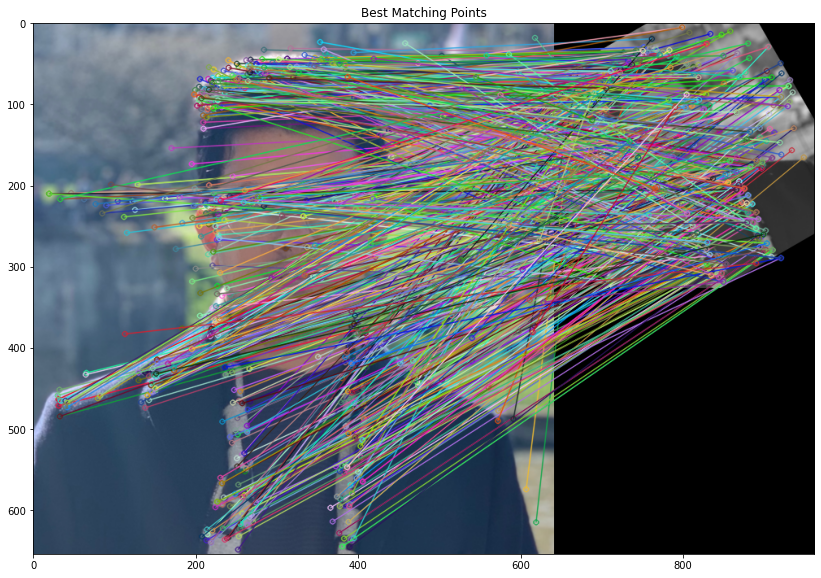


Number of Matching Keypoints Between The Training and Query Images:  689


In [14]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 14.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

#Local-Feature-Matching
src: https://github.com/mmahrouss/Local-Feature-Matching

In [16]:
!git clone https://github.com/mmahrouss/Local-Feature-Matching.git
%cd Local-Feature-Matching

Cloning into 'Local-Feature-Matching'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 106 (delta 52), reused 75 (delta 27), pack-reused 0
Receiving objects: 100% (106/106), 7.22 MiB | 25.87 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/Local-Feature-Matching


Getting interest points...
R threshold:  0.005  Stride:  2 Gaussian sigma:  0.2  Alpha:  0.06
R threshold:  0.005  Stride:  2 Gaussian sigma:  0.2  Alpha:  0.06
Getting features...
Matching features...
Matches: 1124
Accuracy on 50 most confident: 100%
Accuracy on 100 most confident: 99%
Accuracy on all matches: 76%
Vizualizing...


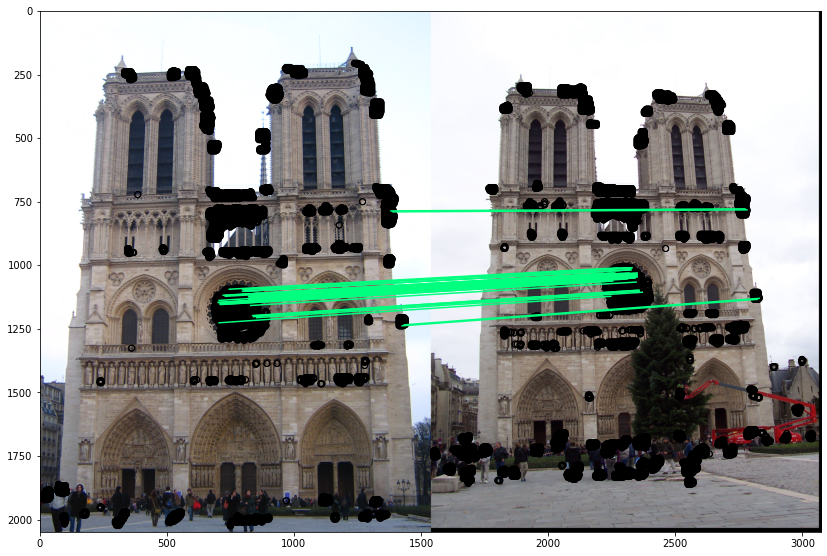

(50, 99, 855)

In [26]:
import tkinter
import matplotlib
matplotlib.use('TkAgg')
import student as student
from helpers import evaluate_correspondence, cheat_interest_points
from skimage import io, img_as_float32
from skimage.transform import rescale
from skimage.color import rgb2gray

image1_file = "data/NotreDame/NotreDame1.jpg"
image2_file = "data/NotreDame/NotreDame2.jpg"
eval_file = "data/NotreDame/NotreDameEval.mat"

image1_color = img_as_float32(io.imread(image1_file))
image2_color = img_as_float32(io.imread(image2_file))
image1 = rgb2gray(image1_color)
image2 = rgb2gray(image2_color)
scale_factor = 0.5
image1 = np.float32(rescale(image1, scale_factor))
image2 = np.float32(rescale(image2, scale_factor))

# width and height of each local feature, in pixels
feature_width = 16
print("Getting interest points...")
(x1, y1) = student.get_interest_points(image1, feature_width)
(x2, y2) = student.get_interest_points(image2, feature_width)
print("Getting features...")
image1_features = student.get_features(image1, x1, y1, feature_width)
image2_features = student.get_features(image2, x2, y2, feature_width)
print("Matching features...")
matches, confidences = student.match_features(image1_features, image2_features)
print("Matches: " + str(matches.shape[0]))
num_pts_to_visualize = 50
evaluate_correspondence(image1_color, image2_color, eval_file, scale_factor,
                            x1, y1, x2, y2, matches, confidences, num_pts_to_visualize, 'notre_dame_matches.jpg')

#Image Stitching (aka Mosaicing)
Projective Transform: https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/20172018/LabExercises/Lab_ImageMosaic.html<br>
Projectivetransformation is an alternative approach to template matching. In this approach, some correspondences between points on planes in the scene and its corresponding points in the image are required.  First, for each
input image, a homography matrix is computed using the provided point correspondences. Then, the processed images are projected on a single reference plane using the computed homographies.<br>
get images

In [ ]:
!git clone https://github.com/Hoya-kim/Image-warping-stitching.git

The left and right images to stitch


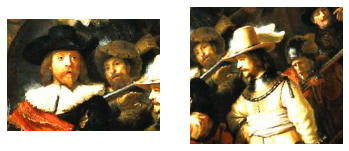

In the left and right image we have selected 4 corresponding points by hand


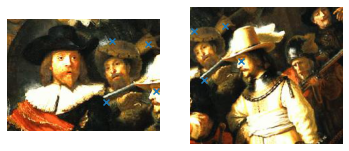

From these point correspondences we can calculate the projective transform P
 that maps coordinates in the right image (in the xaya array) onto coordinates in the left image (in the array xy).
PerspectiveTransform:
 [[ 1.01685498e+00  3.12932553e-01 -1.63082057e+02]
 [-2.17037452e-01  9.92701412e-01  4.39692054e+01]
 [ 4.93917724e-04  5.87218302e-04  1.00000000e+00]]


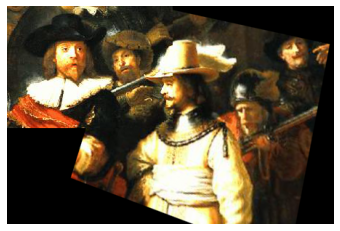

In [62]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from skimage.transform import warp

print('The left and right images to stitch')
f1 = plt.imread('Image-warping-stitching/images/nachtwacht1.jpg')/255
plt.subplot(121); plt.imshow(f1); plt.axis('off');
f2 = plt.imread('Image-warping-stitching/images/nachtwacht2.jpg')/255
plt.subplot(122); plt.imshow(f2); plt.axis('off');
plt.show()

#In the left and right image we have selected 4 corresponding points by hand:
print('In the left and right image we have selected 4 corresponding points by hand')
# points in left image:
xy = np.array([[ 157, 32],[ 211, 37],[ 222,107],[ 147,124]])
# points in right image:
xaya = np.array([[  6, 38], [ 56, 31],[ 82, 87],[ 22,118]])
plt.subplot(121); plt.imshow(f1); plt.axis('off');
plt.scatter(xy[:,0], xy[:,1], marker='x');
plt.subplot(122); plt.imshow(f2); plt.axis('off');
plt.scatter(xaya[:,0], xaya[:,1], marker='x');
plt.show()

print('From these point correspondences we can calculate the projective transform P\n that maps coordinates in the right image (in the xaya array) onto coordinates in the left image (in the array xy).')

P = cv2.getPerspectiveTransform(xy.astype(np.float32), xaya.astype(np.float32))
print('PerspectiveTransform:\n',P)
f_stitched = warp(f2, P, output_shape=(300,450))
M, N = f1.shape[:2]
f_stitched[0:M, 0:N, :] = f1
plt.imshow(f_stitched); plt.axis('off')
plt.show()

#Image warping with making homography matirx
And then, stitching image by using OpenCV<br>
src:https://github.com/Hoya-kim/Image-warping-stitching

<img src="https://github.com/Hoya-kim/Image-warping-stitching/raw/master/images/Theory/1.png" width="300"/>
<img src="https://github.com/Hoya-kim/Image-warping-stitching/raw/master/images/Theory/2.png" width="300"/>
<img src="https://github.com/Hoya-kim/Image-warping-stitching/raw/master/images/Theory/3.png" width="300"/>

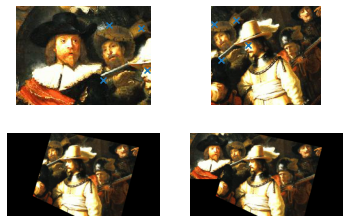

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.linalg as lin

from skimage.transform import warp

# Image read
f1 = plt.imread('Image-warping-stitching/images/nachtwacht1.jpg')/255
f2 = plt.imread('Image-warping-stitching/images/nachtwacht2.jpg')/255

# Setting matching points in first image
xy_1 = np.array([[157, 32],  # x1[0][0], y1[0][1]
                 [211, 37],  # x2[1][0], y2[1][1]
                 [222, 107],  # x3[2][0], y3[2][1]
                 [147, 124]])  # x4[3][0], y4[3][1]

# Setting matching points in second image
xy_2 = np.array([[6, 38],  # x'1[0][0], y'1[0][1]
                 [56, 31],  # x'2[1][0], y'2[1][1]
                 [82, 85],  # x'3[2][0], y'3[2][1]
                 [22, 118]])  # x'4[3][0], y'4[3][1]

# Get homography matrix with cv2 module
# cv2_Homography = cv2.getPerspectiveTransform(xy_1.astype(np.float32), xy_2.astype(np.float32))

# Make homography matrix
# Make matrix A
arrayA = np.array([[xy_1[0][0], xy_1[0][1], 1, 0, 0, 0, -xy_1[0][0] * xy_2[0][0], -xy_1[0][1] * xy_2[0][0]],
                   [0, 0, 0, xy_1[0][0], xy_1[0][1], 1, -xy_1[0][0] * xy_2[0][1], -xy_1[0][1] * xy_2[0][1]],
                   [xy_1[1][0], xy_1[1][1], 1, 0, 0, 0, -xy_1[1][0] * xy_2[1][0], -xy_1[1][1] * xy_2[1][0]],
                   [0, 0, 0, xy_1[1][0], xy_1[1][1], 1, -xy_1[1][0] * xy_2[1][1], -xy_1[1][1] * xy_2[1][1]],
                   [xy_1[2][0], xy_1[2][1], 1, 0, 0, 0, -xy_1[2][0] * xy_2[2][0], -xy_1[2][1] * xy_2[2][0]],
                   [0, 0, 0, xy_1[2][0], xy_1[2][1], 1, -xy_1[2][0] * xy_2[2][1], -xy_1[2][1] * xy_2[2][1]],
                   [xy_1[3][0], xy_1[3][1], 1, 0, 0, 0, -xy_1[3][0] * xy_2[3][0], -xy_1[3][1] * xy_2[3][0]],
                   [0, 0, 0, xy_1[3][0], xy_1[3][1], 1, -xy_1[3][0] * xy_2[3][1], -xy_1[3][1] * xy_2[3][1]]])
M_A = np.asmatrix(arrayA)

# transpose matrix A
M_At = M_A.T

# Make matrix b
arrayB = np.array([[xy_2[0][0]],
                   [xy_2[0][1]],
                   [xy_2[1][0]],
                   [xy_2[1][1]],
                   [xy_2[2][0]],
                   [xy_2[2][1]],
                   [xy_2[3][0]],
                   [xy_2[3][1]]])
M_B = np.asmatrix(arrayB)

# Make homography matrix
My_Homography = np.asarray((M_At * M_A).I * (M_At * M_B))

My_Homography_arr = np.array([[My_Homography[0][0], My_Homography[1][0], My_Homography[2][0]],
                              [My_Homography[3][0], My_Homography[4][0], My_Homography[5][0]],
                              [My_Homography[6][0], My_Homography[7][0], 1]])

# My_homography's inverse
inv_my_homo = lin.inv(My_Homography_arr)

# Homographic transformation with cv2 module
# cv2_warped = warp(f2, cv2_Homography, output_shape=(300, 550))

# Make blank image
warped = np.zeros((300, 550, 3), np.float32)

# Make warping source
for y in range(0, 300):
    for x in range(0, 550):
        pixel = np.array([[x],
                          [y],
                          [1]])

        # Resource_pixel = np.asarray(np.asmatrix(inv_my_homo) * np.asmatrix(pixel))
        Resource_pixel = np.asarray(np.asmatrix(My_Homography_arr) * np.asmatrix(pixel))

        # Coordinate scale
        trans_x = Resource_pixel[0][0] / Resource_pixel[2][0]
        trans_y = Resource_pixel[1][0] / Resource_pixel[2][0]

        # Continue that pixels not matched
        if (trans_x < 0 or trans_y < 0
                or trans_x > f2.shape[1] - 1 or trans_y > f2.shape[0] - 1):
            continue

        # divided by two parts with integer & decimal number
        tx = int(trans_x)
        ty = int(trans_y)
        a = trans_x - tx
        b = trans_y - ty

        # Bilinear Interpolation
        warped[y][x] = ((((1.0 - a) * (1.0 - b)) * f2[ty][tx])
                        + ((a * (1.0 - b)) * f2[ty][tx + 1])
                        + ((a * b) * f2[ty + 1][tx + 1])
                        + (((1.0 - a) * b) * f2[ty + 1][tx]))

# Image stitch
M, N = f1.shape[:2]
f_stitched = np.copy(warped)
f_stitched[0:M, 0:N, :] = f1

# Plot
plt.subplot(221)
plt.imshow(f1)
plt.axis('off')
plt.scatter(xy_1[:, 0], xy_1[:, 1], marker='x')
plt.subplot(222)
plt.imshow(f2)
plt.axis('off')
plt.scatter(xy_2[:, 0], xy_2[:, 1], marker='x')
plt.subplot(223)
plt.imshow(warped)
plt.axis('off')
plt.subplot(224)
plt.imshow(f_stitched)
plt.axis('off')
plt.show()